In [1]:
from utils import *

## First Approaches

### Linear Model

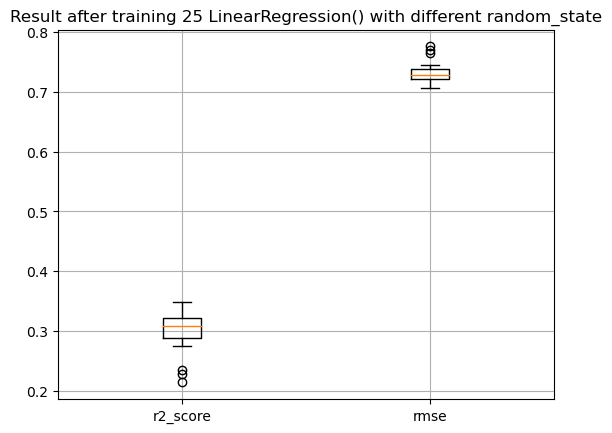

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([ 0.11456759, -0.23856916, -0.0064437 ,  0.31098642, -0.03331301,
        0.10068479, -0.09725216, -0.30629441,  0.07493612,  0.11727341,
        0.27989479,  0.153866  ])

In [4]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
value = multi_test(linear_model,X,Y,n=25)
print(data_train.columns)
linear_model.coef_

In [5]:
submit_linear = submission(LinearRegression(),name_file="Submissions/linear_submission.csv")

Grid Search Progress: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

LinearRegression(fit_intercept=False)


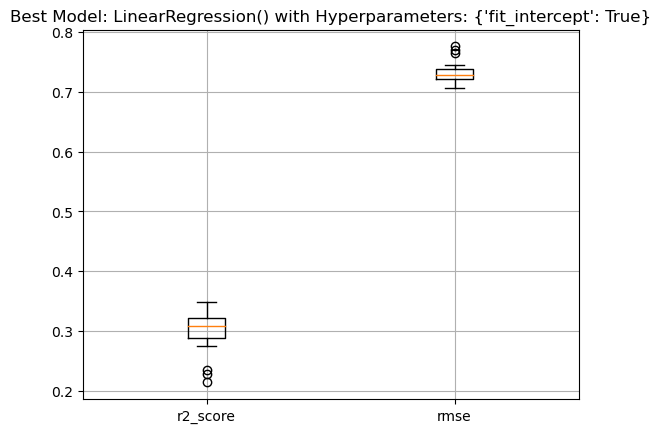

Best hyperparameters: {'fit_intercept': True}
Best score (r2_score): 0.3011840044179135


In [6]:
hyperparameters = {
    "fit_intercept": [True, False]
}

linear_model = LinearRegression()
# Appeler la fonction grid_search avec le modèle linéaire
best_model_linear, best_params_linear, best_score_linear, all_results_linear = grid_search(
    linear_model, X, Y, hyperparameters, n=25, random_start= 42, display_boxplot=True)

In [7]:
submit_best_linear = submission(best_model_linear,name_file="Submissions/best_linear_submission.csv")

We try an alternative approach by only using some of the features that are the most correlated to the target.

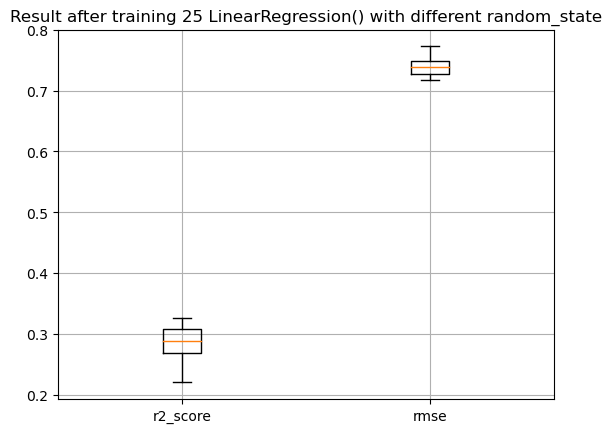

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'target'],
      dtype='object')


array([ 0.4323401 ,  0.12349071,  0.0796447 , -0.26589082,  0.0949882 ])

In [8]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
value = multi_test(linear_model,X[["alcohol","residual sugar","sulphates","volatile acidity","wine_type"]],Y,n=25)
print(data_train.columns)
linear_model.coef_

##### Ridge

Grid Search Progress: 100%|██████████| 18/18 [00:08<00:00,  2.11it/s]

Ridge(alpha=1000, fit_intercept=False)


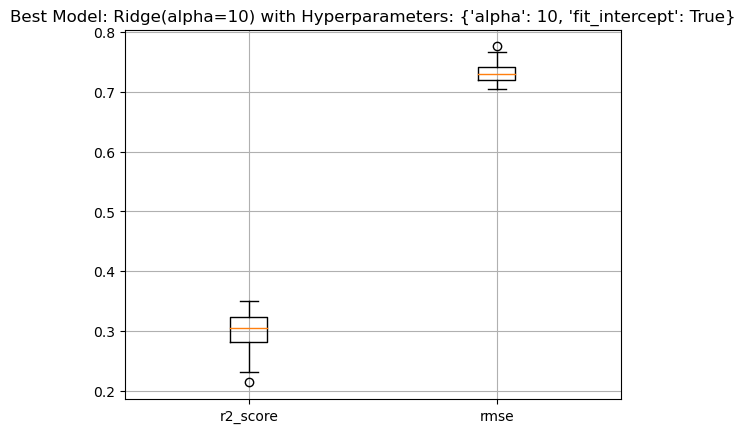

Best hyperparameters: {'alpha': 10, 'fit_intercept': True}
Best score (r2_score): 0.3006111864509737


In [9]:
hyperparameters = {
    "alpha":[0.1,0.3,0.5,1,2,4,10,100,1000],
    "fit_intercept": [True, False]
}

Ridge_model = Ridge()
best_model_ridge, best_params_ridge, best_score_ridge, all_results_ridge = grid_search(
    Ridge_model, X, Y, hyperparameters, n=50, random_start= 42, display_boxplot=True)

In [10]:
submit_best_ridge = submission(best_model_ridge,name_file="Submissions/best_ridge_submission.csv")

##### Lasso


Grid Search Progress: 100%|██████████| 90/90 [00:44<00:00,  2.03it/s]

Lasso(alpha=1000, fit_intercept=False, tol=0.1)


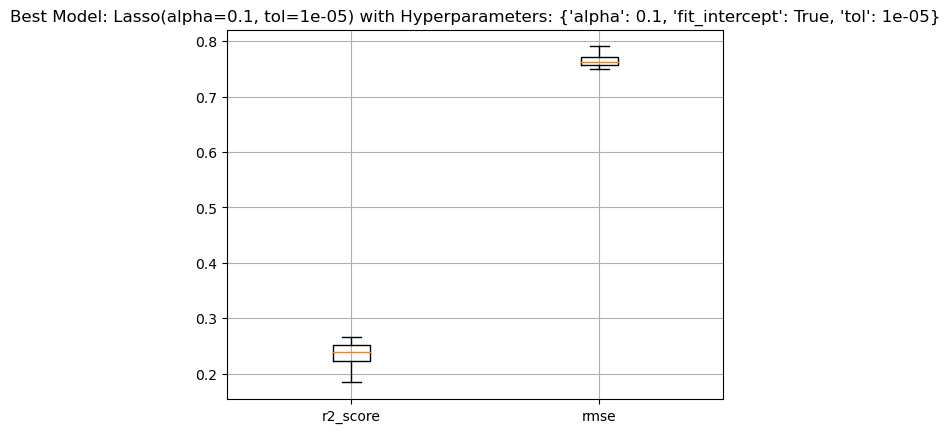

Best hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'tol': 1e-05}
Best score (r2_score): 0.23689554956521663


In [11]:
hyperparameters = {
    "alpha":[0.1,0.3,0.5,1,2,4,10,100,1000],
    "fit_intercept": [True, False],
    "tol":[0.00001,0.0001,0.001,0.01,0.1],
}

Lasso_model = Lasso()
best_model_lasso, best_params_lasso, best_score_lasso, all_results_lasso = grid_search(
    Lasso_model, X, Y, hyperparameters, n=50, random_start= 42, display_boxplot=True)

In [12]:
submit_best_lasso = submission(best_model_lasso,name_file="Submissions/best_lasso_submission.csv")

### SVM

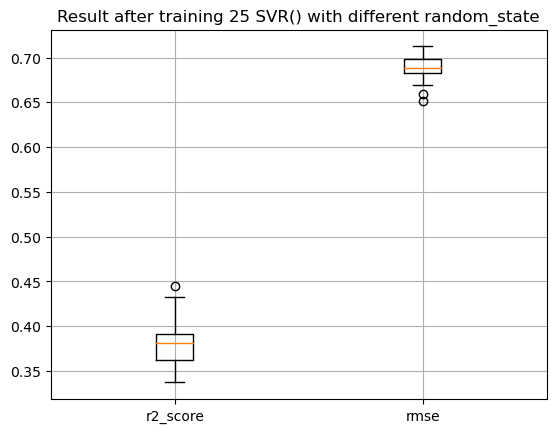

In [13]:
from sklearn import svm
svm_model = svm.SVR()
value = multi_test(svm_model,X,Y,n=25)

In [14]:
from sklearn import svm
svm_model = svm.SVR()
submit_svm = submission(svm_model,name_file="Submissions/svm_submission.csv")

Grid Search Progress: 100%|██████████| 72/72 [33:00<00:00, 27.51s/it]

SVR(degree=4, epsilon=0.2, gamma='auto')


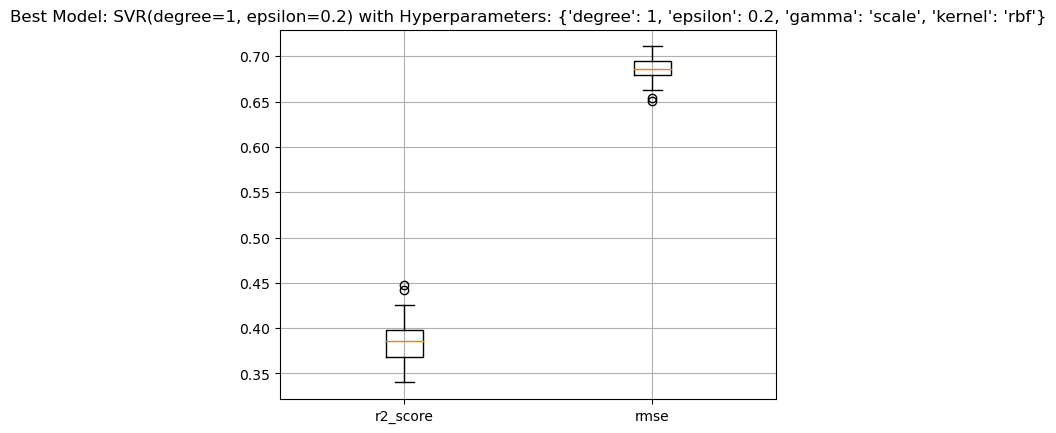

Best hyperparameters: {'degree': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
Best score (r2_score): 0.3865766500527355


In [15]:
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

hyperparameters = {
    "kernel": [ "linear",'poly','rbf'],
    'degree': [ 1,2,3,4],
    "gamma": ["scale","auto"],
    "epsilon": [0.01,0.1,0.2],
}

SVM_model = svm.SVR()

best_model_svm, best_params_svm, best_score_svm, all_results_svm = grid_search(
    SVM_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/SVM/grid_best_model.joblib" ,display_boxplot=True)

In [16]:
submit_best_svm = submission(best_model_svm,name_file="Submissions/best_svm_submission.csv")

### RandomForest

Grid Search Progress: 100%|██████████| 36/36 [2:01:46<00:00, 202.95s/it]


RandomForestRegressor(criterion='absolute_error', max_depth=200,
                      n_estimators=500, n_jobs=8, random_state=42)


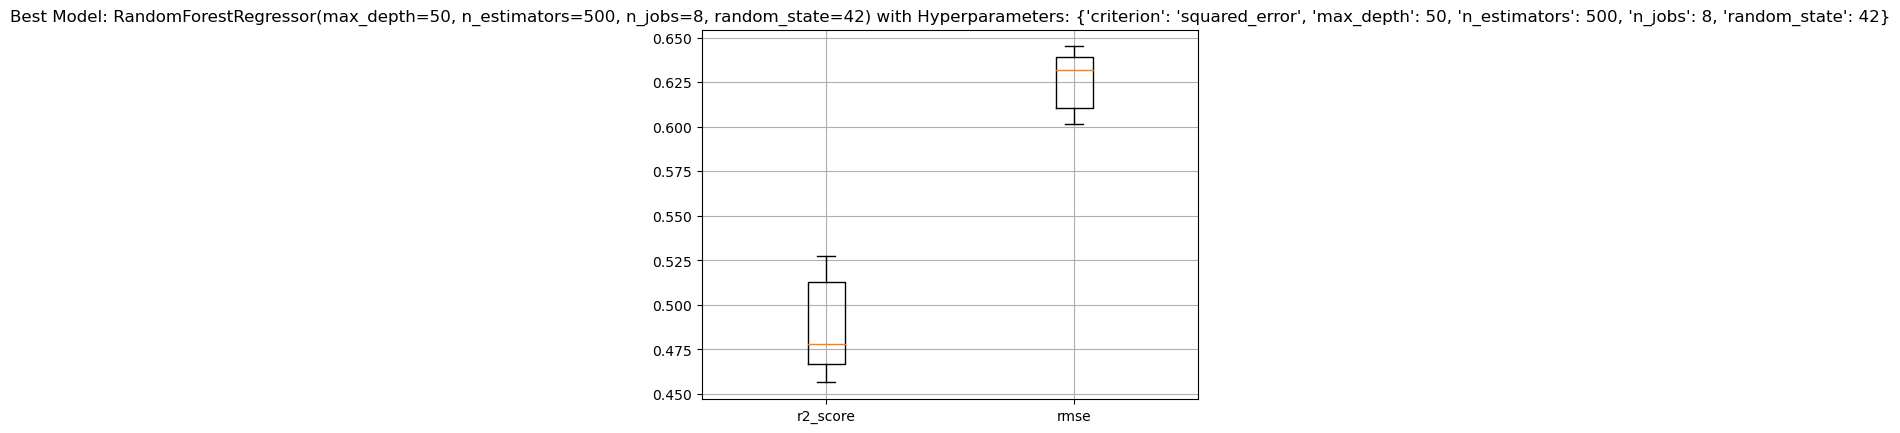

Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 50, 'n_estimators': 500, 'n_jobs': 8, 'random_state': 42}
Best score (r2_score): 0.48829110202266823


In [17]:
random_seed = 42
param_grid = {
    'n_estimators': [100,250,500],
    'criterion':["friedman_mse",'squared_error','absolute_error'],
    'max_depth': [20,50,100,200],
    'random_state':[random_seed],
    'n_jobs':[nb_cpu//2],
}

forest_model = RandomForestRegressor()

best_model_forest_regressor, best_params_forest_regressor, best_score_forest_regressor, all_results_forest_regressor = grid_search(
    forest_model, X, Y, param_grid, n=5, random_start= 42,
    saving_path="Archives_Model/Random_Forest_Regressor/grid_best_model.joblib" ,display_boxplot=True)

In [18]:
submit_best_forest_regressor = submission(best_model_forest_regressor,name_file="Submissions/best_forest_regressor_submission.csv")

### K Neighbor

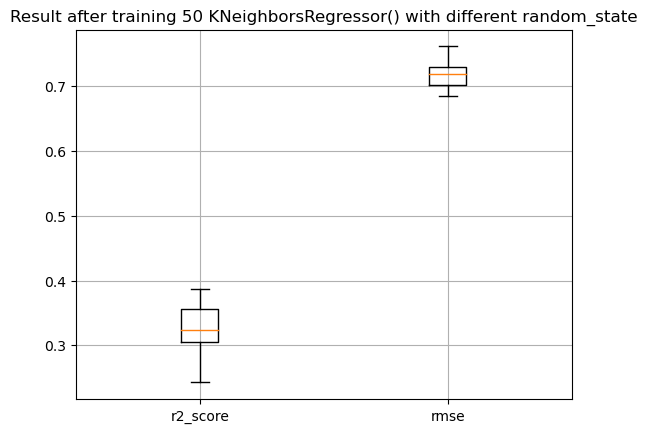

In [19]:
neighbor_model = KNeighborsRegressor()
value = multi_test(neighbor_model,X,Y,n=50)

In [20]:
submit_neighbor = submission(neighbor_model,name_file="Submissions/neighbor_submission.csv")

Grid Search Progress:   0%|          | 0/96 [00:00<?, ?it/s]

Grid Search Progress: 100%|██████████| 96/96 [10:57<00:00,  6.85s/it]


KNeighborsRegressor(leaf_size=40, n_jobs=16, n_neighbors=60, p=3,
                    weights='distance')


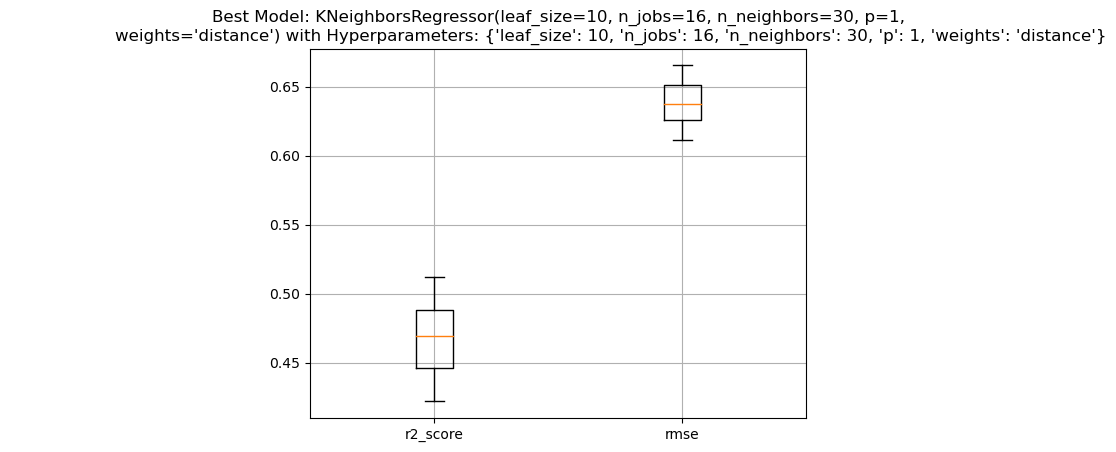

Best hyperparameters: {'leaf_size': 10, 'n_jobs': 16, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Best score (r2_score): 0.46589377927951625


In [ ]:
hyperparameters = {
    "weights": [ "uniform",'distance'],
    'p': [ 1,2,3],
    'n_neighbors': [5,15,30,60],
    'leaf_size': [10,20,30,40],
    "n_jobs" : [nb_cpu]
}

neighbor_model = KNeighborsRegressor()

best_model_neighbor_regressor, best_params_neighbor_regressor, best_score_neighbor_regressor, all_results_neighbor_regressor = grid_search(
    neighbor_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/KNeighbors_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [22]:
submit_best_neighbor_regressor = submission(best_model_neighbor_regressor,name_file = "Submissions/best_neighbor_regressor_submission.csv")

### Gradient Boosting

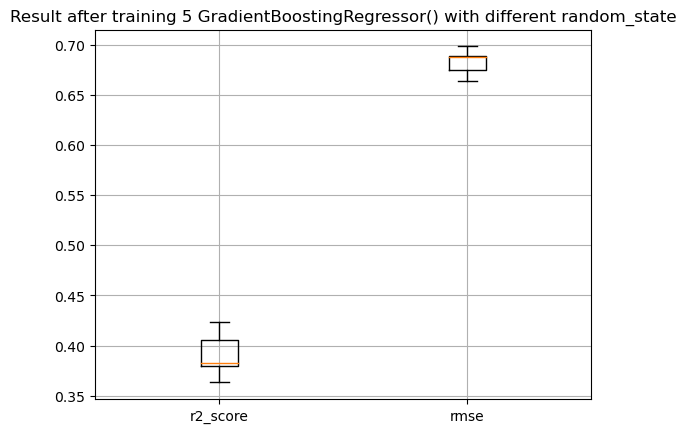

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
boosting_model = GradientBoostingRegressor()
value = multi_test(boosting_model,X,Y,n=5)

In [24]:
submit_boosting_regressor = submission(GradientBoostingRegressor(),name_file = "Submissions/boosting_regressor_submission.csv")

Grid Search Progress: 100%|██████████| 96/96 [2:30:09<00:00, 93.85s/it]    

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.2,
                          loss='absolute_error', max_depth=400,
                          n_estimators=500, n_iter_no_change=15,
                          random_state=42)


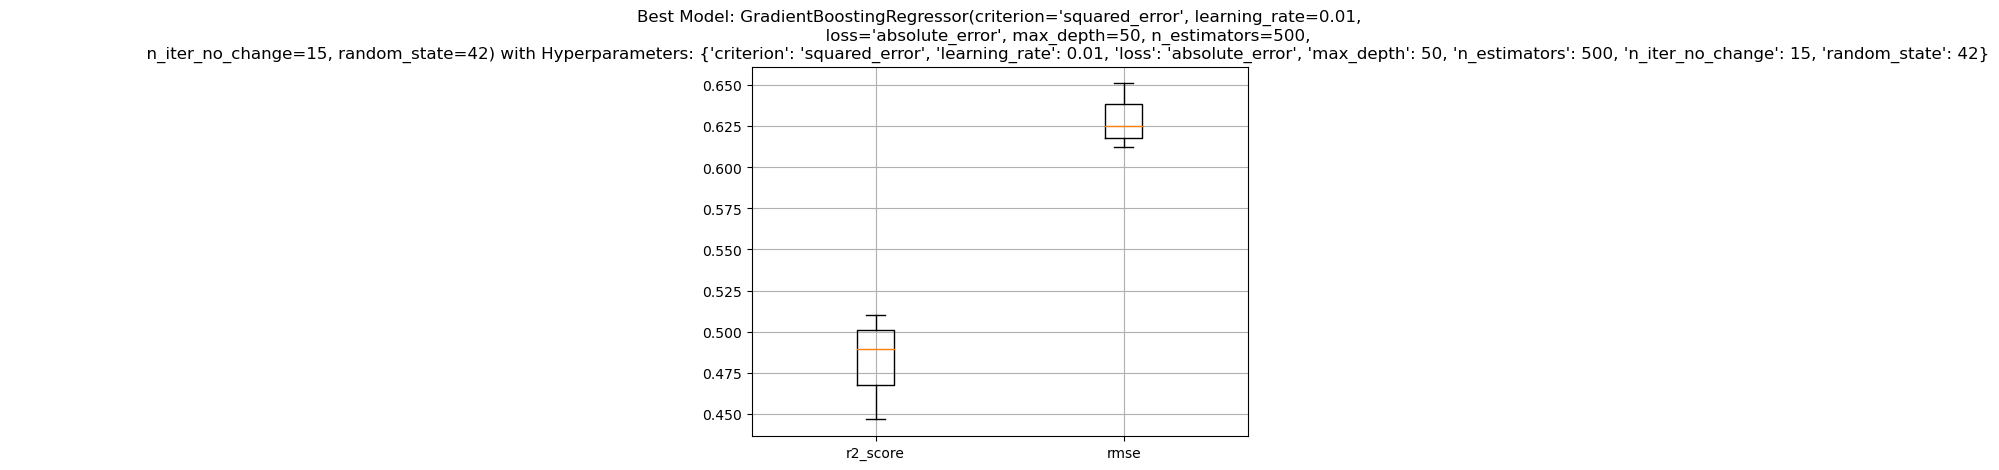

Best hyperparameters: {'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 50, 'n_estimators': 500, 'n_iter_no_change': 15, 'random_state': 42}
Best score (r2_score): 0.483085502056552


In [25]:
random_seed = 42

hyperparameters = {
    "loss": [ "squared_error",'absolute_error'],
    'learning_rate': [ 0.01,0.1,0.2],#, 0.2],
    'n_estimators': [250,500],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200,400],
    "n_iter_no_change" : [15],
    "random_state": [random_seed],
}

boosting_model = GradientBoostingRegressor()

best_model_boosting, best_params_boosting, best_score_boosting, all_results_boosting = grid_search(
    boosting_model, X, Y, hyperparameters, n=5, random_start= random_seed,
    saving_path="Archives_Model/Boosting_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [26]:
submit_best_boosting_regressor = submission(best_model_boosting,name_file = "Submissions/best_boosting_regressor_submission.csv")

the following cells are too long to execute but testify of our will to test several approaches

In [7]:
random_seed = 42
param_grid = {
    "loss": ['absolute_error'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100,250],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200,400],
    'random_state':[random_seed],
    'n_iter_no_change': [10],
}

boosting_model = GradientBoostingRegressor()

grid_search_CV = GridSearchCV(estimator=boosting_model, param_grid=param_grid, scoring='r2', cv=4,verbose=2,n_jobs=nb_cpu//2)

grid_search_CV.fit(X, Y)
best_params_boost = grid_search_CV.best_params_
best_model_boost = grid_search_CV.best_estimator_

Fitting 4 folds for each of 48 candidates, totalling 192 fits


In [8]:
save_model(best_model_boost,path_to_save="Archives_Model/Boosting_Regressor/scikit_GDCV_best_model")

In [9]:
submit_best_GDCV_boost_regressor = submission(best_model_boost,name_file = "Submissions/best_boost_GDCV_regressor_submission.csv")

# Classification approach

## Reg Logistique 

### Logistic Regression

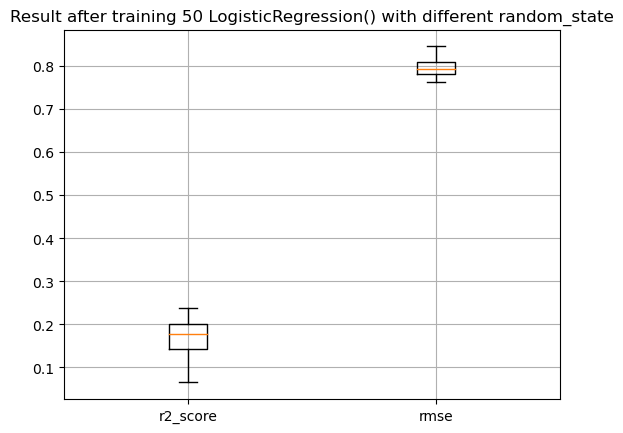

In [30]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
value = multi_test(logistic_model,X,Y,n=50)

In [31]:
submit_logistic = submission(LogisticRegression(),name_file="Submissions/logistic_submission.csv")

Grid Search Progress: 100%|██████████| 72/72 [10:17<00:00,  8.57s/it]


LogisticRegression(C=10, max_iter=500, tol=1e-05)


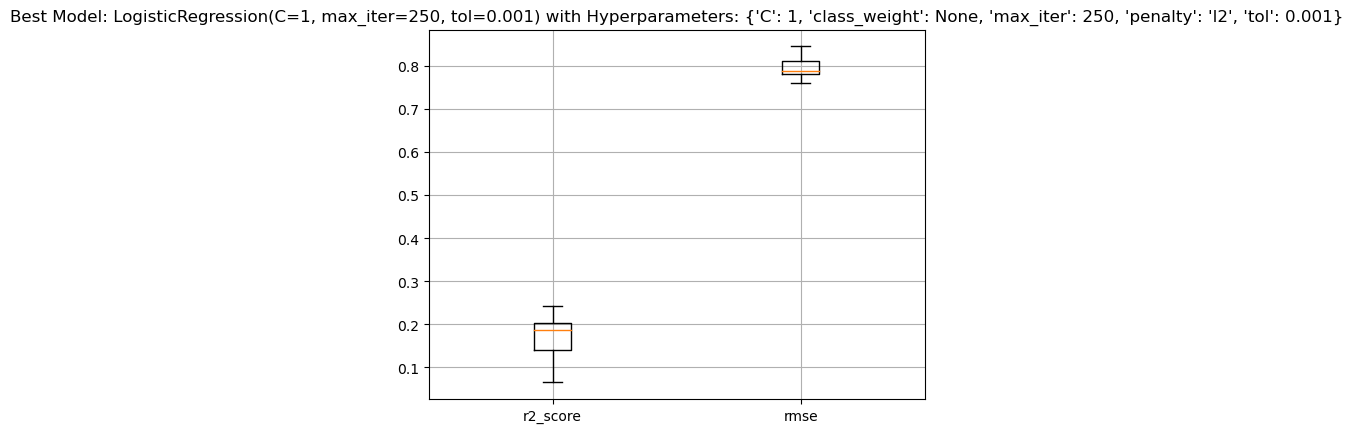

Best hyperparameters: {'C': 1, 'class_weight': None, 'max_iter': 250, 'penalty': 'l2', 'tol': 0.001}
Best score (r2_score): 0.17294642057163345


In [32]:
import warnings
warnings.filterwarnings("ignore")

hyperparameters = {
    "penalty": [ "l2"],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100,250,500],
    'tol': [1e-3,1e-4, 1e-5],
}

logistic_model = LogisticRegression()

best_model_logistic, best_params_logistic, best_score_logistic, all_results_logistic = grid_search(
    logistic_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Logistic_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [33]:
submit_best_logistic = submission(best_model_logistic,name_file="Submissions/best_logistic_submission.csv")

## Kforest

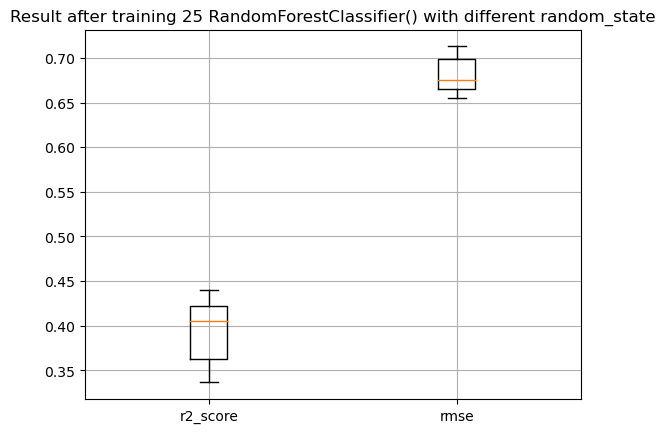

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_model_classif = RandomForestClassifier()
value = multi_test(forest_model_classif,X,Y,n=25)

### Kneighbors

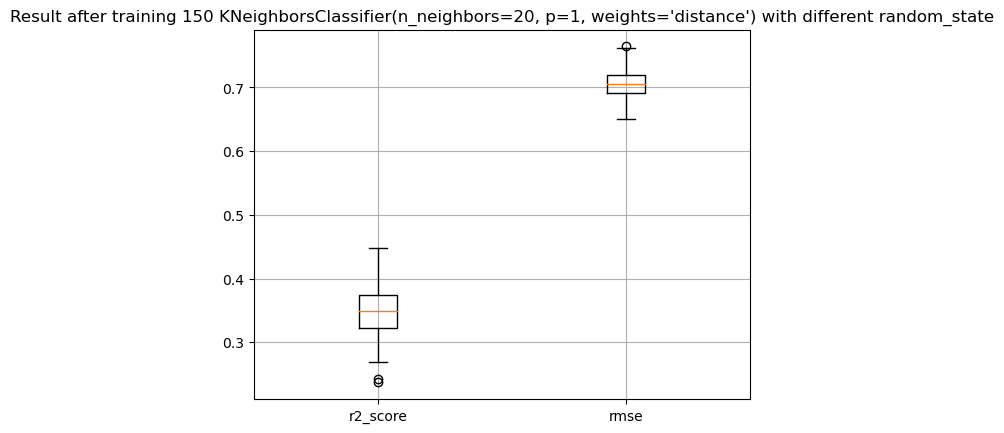

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_model_classif = KNeighborsClassifier(n_neighbors=20,weights="distance",p=1)
value = multi_test(neighbors_model_classif,X,Y,n=150)

In [36]:
submit_neighbor_classifier = submission(neighbors_model_classif,name_file = "Submissions/neighbor_classif_submissions.csv")

Grid Search Progress: 100%|██████████| 120/120 [11:27<00:00,  5.73s/it]


KNeighborsClassifier(leaf_size=40, n_jobs=16, n_neighbors=60, p=3,
                     weights='distance')


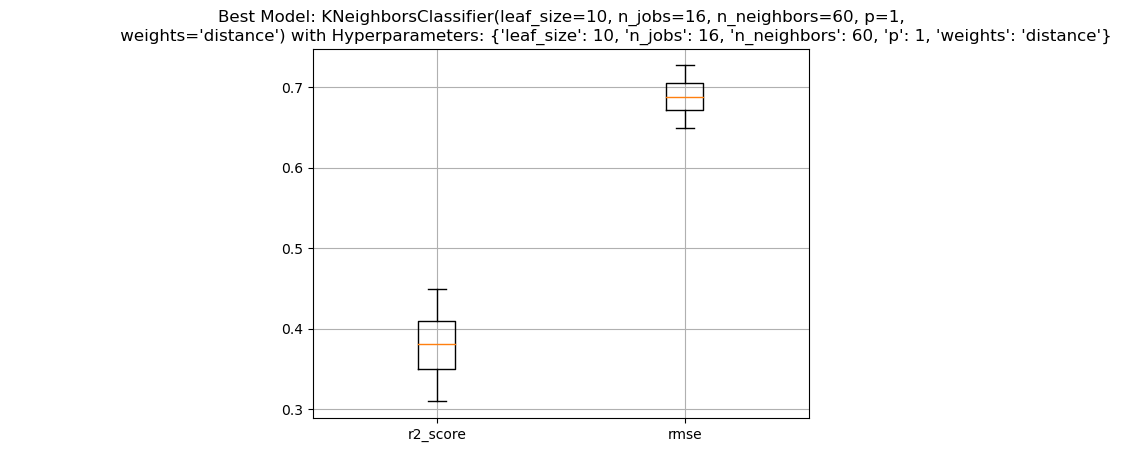

Best hyperparameters: {'leaf_size': 10, 'n_jobs': 16, 'n_neighbors': 60, 'p': 1, 'weights': 'distance'}
Best score (r2_score): 0.37798869948929315


In [37]:
hyperparameters = {
    "weights": [ "uniform",'distance'],
    'p': [ 1,2,3],
    'n_neighbors': [5,10,20,30,60],
    'leaf_size': [10,20,30,40],
    "n_jobs" : [nb_cpu]
}

neighbor_model = KNeighborsClassifier()

best_model_neighbor_classifier, best_params_neighbor_classifier, best_score_neighbor_classifier, all_results_neighbor_classifier = grid_search(
    neighbor_model, X, Y, hyperparameters, n=50, random_start= 42,
    saving_path="Archives_Model/KNeighbors_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [38]:
submit_best_neighbor_classifier = submission(best_model_neighbor_classifier,name_file = "Submissions/best_neighbor_classif_submissions.csv")

## Boosting Classif

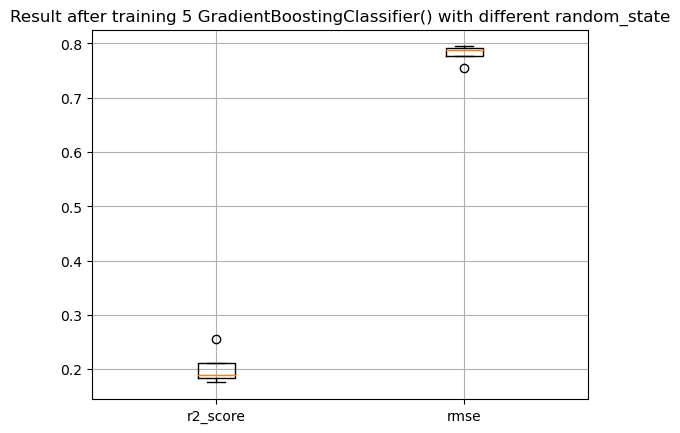

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
boosting_model = GradientBoostingClassifier()
value = multi_test(boosting_model,X,Y,n=5)